In [12]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1 style="text-align: center;">Lesson 11: Pandas</h1>

## 1. What is Pandas?

Pandas là một thư viện Python được sử dụng để làm việc với các tập dữ liệu dạng bảng.

Nó có chức năng phân tích, làm sạch, khám phá và thao tác dữ liệu.

Được tạo bởi Wes McKinney vào năm 2008

Cái tên 'Pandas' xuất phát từ "Panel Data" và "Python and Data Analysis"

Tài liệu chính thống để sử dụng Pandas là phần tài liệu đặc tả trên trang chủ của nó: https://pandas.pydata.org/docs

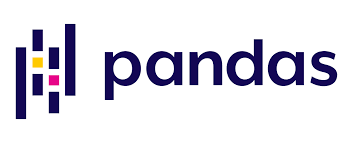


## 2. Installation

Sử dụng command line và gõ lệnh: pip install pandas

Trong anaconda đã có cài sẵn thư viện pandas nên mình không cần cài nữa nhé

In [8]:
!pip install pandas

In [7]:
!pip show pandas

Name: pandas
Version: 1.0.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\admin\anaconda3\lib\site-packages
Requires: pytz, numpy, python-dateutil
Required-by: yfinance, streamlit, statsmodels, seaborn, pyspark-dist-explore, fix-yahoo-finance, fbprophet, cmdstanpy, altair


Trước khi sử dụng pandas ta cần import nó. Cộng đồng sử dụng trên toàn thế giới thông nhất sử dụng từ viết tắt cho nó là pd. Vì vậy cú pháp import như sau

In [2]:
import pandas as pd

print("Pandas Version :",pd.__version__)

Pandas Version : 1.0.5


## 3. Pandas DataFrame

DataFrame là cấu trúc dữ liệu được định nghĩa bởi Pandas. Nó lưu trữ dữ liệu dạng bảng gồm hàng(row) và cột(column)

Nó tương tự như kiểu dict mà ta đã học (ở lesson 3), hay mảng 2 chiều trong Numpy

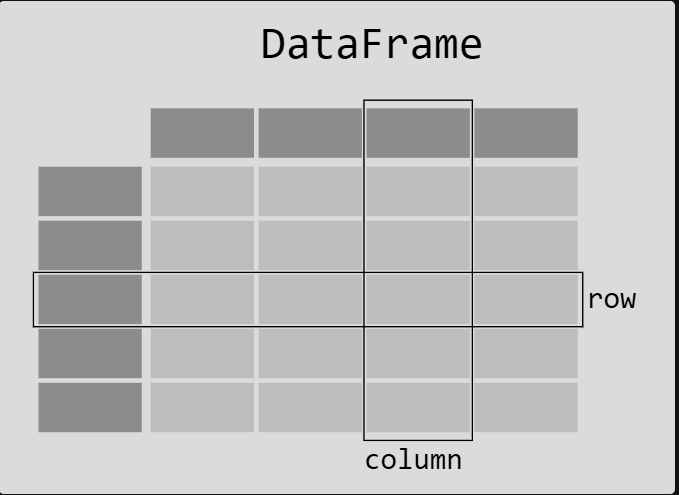

Ví dụ ta cần lưu trữ dữ liệu về thông tin của người dùng, gồm có tên, tuổi, giới tính. Nếu ta sử dụng kiểu dữ liệu dict có sẵn trong Python thì có thể sử dụng như sau

In [4]:
info_user_1 = {
    'name' : ["hieu","phong", "trinh"],
    'age' : [23, 25, 18],
    'sex' : ["male", "male", "female"]
}

info_user_2 = {
    "name": {
        'user1' : "hieu",
        'user2' : "phong",
        'user3' : "trinh"
    },

    "age": {
        'user1' : 23,
        'user2' : 25,
        'user3' : 18
    },

    "sex": {
        'user1' : "male",
        'user2' : "male",
        'user3' : "female"
    }
}

Như vậy khi thao tác truy vấn hoặc xử lí dữ liệu sẽ gặp khó khăn bởi các kiểu dữ liệu này chỉ có một số thuộc tính và phương thức cơ bản như thêm, sửa, xóa,... (đã học ở lession3)

Bởi thế, Pandas ra đời và tạo ra các thuộc tính và phương thức hỗ trợ tận chân tơ kẽ tóc cho các thao tác xử lí này

Và Pandas định nghĩa ra 1 kiểu dữ liệu là DataFrame để lưu trữ dữ liệu dạng bảng này. Cú pháp khởi tạo nó như sau

In [66]:
import pandas as pd

df_info_user = pd.DataFrame(info_user_2)
df_info_user
print(type(df_info_user))

,name,age,sex
user1,hieu,23,male
user2,phong,25,male
user3,trinh,18,female


<class 'pandas.core.frame.DataFrame'>


## 4. Pandas Series

Ngoài dataframe, trong pandas còn một kiểu dữ liệu nữa là Series. Nó chính là một cột của Dataframe

Nó tương tự như kiểu List được định nghĩa sẵn trong Python, hay mảng 1 chiều trong Numpy

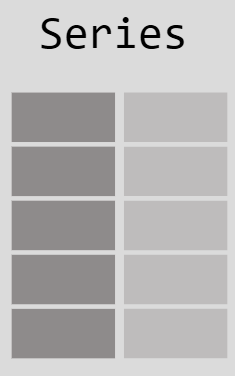

Ví dụ ta cần lấy thông tin về tên các khách hàng trong dữ liệu thông tin khách hàng

In [27]:
sr_names = df_info_user["name"]
sr_names
print(type(sr_names))

0     hieu
1    phong
2    trinh
Name: name, dtype: object

<class 'pandas.core.series.Series'>


Series Pandas cũng có thể khai báo qua kiểu list

In [32]:
names = ["hieu","phong", "trinh"]
sr_names = pd.Series(names)
sr_names
print(type(sr_names))

0     hieu
1    phong
2    trinh
dtype: object

<class 'pandas.core.series.Series'>


## 5. Handling file tabular data

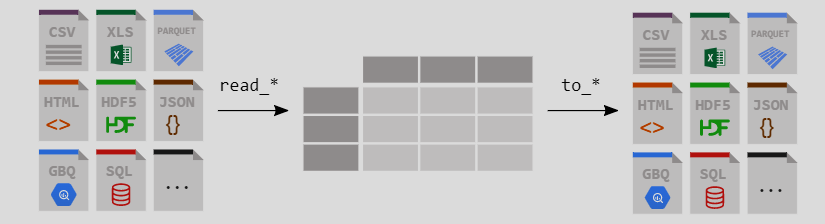

Nếu cần đọc dữ liệu từ 1 file nào đấy ta dùng cú pháp: pd.read_*()

\* là tên dạng file

vd như:
read_csv,
read_excel,
read_json,...

In [72]:
df_info_user = pd.read_csv("./data/info_user.csv")
df_info_user

,name,age,sex
0,hieu,23,male
1,phong,25,male
2,trinh,18,female


Khi cần lưu dữ liệu vào file nào đó ta dùng: DataFrame.to_*()

In [74]:
df_info_user.to_csv('./data/info_user_2.csv',index=False)

In [76]:
df_info_user.to_excel('./data/info_user_2.xlsx',sheet_name="info_user",index=False)

In [81]:
df_info_user = pd.read_excel('./data/info_user_2.xlsx',sheet_name="info_user")
df_info_user

,name,age,sex
0,hieu,23,male
1,phong,25,male
2,trinh,18,female


## 6. Select a subset of a DataFrame

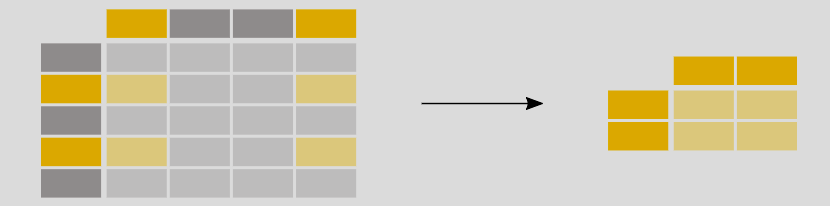

Trong ví dụ sau, ta sẽ sử dụng tập dữ liệu về hành khách trên tàu titanic, được lưu trong file titanic.csv

PassengerId: Id of every passenger.

Survived: Indication whether passenger survived. 0 for yes and 1 for no.

Pclass: One out of the 3 ticket classes: Class 1, Class 2 and Class 3.

Name: Name of passenger.

Sex: Gender of passenger.

Age: Age of passenger in years.

SibSp: Number of siblings or spouses aboard.

Parch: Number of parents or children aboard.

Ticket: Ticket number of passenger.

Fare: Indicating the fare.

Cabin: Cabin number of passenger.

Embarked: Port of embarkation.

In [84]:
# Load data
titanic = pd.read_csv("./data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


    1. Chọn một cột cụ thể nào đó

Ví dự chúng ta quan tâm đến số tuổi của các hành khách và cần lấy ra để xử lí

In [116]:
ages = titanic["Age"]
ages.head()
ages.shape

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

(892,)

In [88]:
age_sex = titanic[["Age", "Sex"]]
age_sex.head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


    2. Chọn hàng cụ thể nào đó


In [104]:
id_above_500 = titanic[titanic['PassengerId'] > 500]
id_above_500.head()
id_above_500.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
500,501,0.0,3.0,"Calic, Mr. Petar",male,17.0,0.0,0.0,315086,8.6625,NaN,S
501,502,0.0,3.0,"Canavan, Miss. Mary",female,21.0,0.0,0.0,364846,7.7500,NaN,Q
502,503,0.0,3.0,"O'Sullivan, Miss. Bridget Mary",female,NaN,0.0,0.0,330909,7.6292,NaN,Q
503,504,0.0,3.0,"Laitinen, Miss. Kristina Sofia",female,37.0,0.0,0.0,4135,9.5875,NaN,S
504,505,1.0,1.0,"Maioni, Miss. Roberta",female,16.0,0.0,0.0,110152,86.5000,B79,S


(391, 12)

In [100]:
type(titanic['PassengerId'] > 500)

pandas.core.series.Series

In [107]:
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
class_23.head()
class_23.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
5,6,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877,8.4583,NaN,Q
7,8,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,NaN,S


(675, 12)

    3. Chọn cả hàng và cột

In [115]:
adult_names = titanic["Name"][titanic["Age"] > 35]
adult_names.head()
adult_names.shape

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                             Bonnell, Miss. Elizabeth
13                          Andersson, Mr. Anders Johan
15                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object

(217,)

## 7. Insert Data

Việc thêm dữ liệu có thể là xuất phát từ dữ liệu hiện có hoặc lấy từ một tập khác.

Hãy quan sát ví dụ sau:

In [182]:
transactions = pd.read_csv('./data/Cafe-Transaction-Store.csv')

Tập dữ liệu này là thông tin giao dịch tại một cửa hàng

In [183]:
transactions.head()
transactions.shape

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


(5392, 5)

Tôi cần tính doanh thu của từng sản phẩm cho từng ngày, thực hiện bằng các nhân Price với quantity và lưu nó vào một cột mới là revenue

In [184]:
transactions["revenue"] = (transactions["PRICE"] * transactions["QUANTITY"])

In [185]:
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,revenue
0,01/01/12,15.50,46,1070,0,713.00
1,01/01/12,12.73,22,2051,2,280.06
2,01/01/12,12.75,18,2052,2,229.50
3,01/01/12,12.60,30,2053,2,378.00
4,01/02/12,15.50,70,1070,0,1085.00


In [186]:
transactions = transactions.rename(columns={"revenue": "REVENUE"}).head()
transactions

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY,REVENUE
0,01/01/12,15.50,46,1070,0,713.00
1,01/01/12,12.73,22,2051,2,280.06
2,01/01/12,12.75,18,2052,2,229.50
3,01/01/12,12.60,30,2053,2,378.00
4,01/02/12,15.50,70,1070,0,1085.00


Giờ tôi muốn thêm cột ngày tháng năm vào dữ liệu chẳng hạn. Nhưng lần này tôi muốn nó ở ngay sau cột CALENDAR_DATE

Đầu tiên ta chuyển nó về dạng DateTime trong pandas cho tiện xử lí nhé

In [194]:
transactions['CALENDAR_DATE'] = pd.to_datetime(transactions['CALENDAR_DATE'])
transactions.dtypes

CALENDAR_DATE    datetime64[ns]
PRICE                   float64
QUANTITY                  int64
SELL_ID                   int64
SELL_CATEGORY             int64
REVENUE                 float64
dtype: object

Sử dụng phương thức insert()

In [195]:
transactions.insert(2,'MONTH',transactions["CALENDAR_DATE"].dt.month,allow_duplicates=True)
transactions.insert(3,'DAY',transactions["CALENDAR_DATE"].dt.day, allow_duplicates=True)
transactions.insert(4,'DAYOFWEEK',transactions["CALENDAR_DATE"].dt.day_name())

In [196]:
transactions.head()

,CALENDAR_DATE,PRICE,MONTH,DAY,DAYOFWEEK,QUANTITY,SELL_ID,SELL_CATEGORY,REVENUE
0,2012-01-01,15.50,1,1,Sunday,46,1070,0,713.00
1,2012-01-01,12.73,1,1,Sunday,22,2051,2,280.06
2,2012-01-01,12.75,1,1,Sunday,18,2052,2,229.50
3,2012-01-01,12.60,1,1,Sunday,30,2053,2,378.00
4,2012-01-02,15.50,1,2,Monday,70,1070,0,1085.00
